In [1]:
import tensorflow as tf
import os
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Project_Final_2023/Taka_Dataset_Final_project.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
base_dir='/content/Taka_Dataset'

In [5]:
IMAGE_SIZE=300
BATCH_SIZE=64

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,

    validation_split=0.2
)

In [6]:
train_generator=train_datagen.flow_from_directory(

     base_dir,
     target_size=(IMAGE_SIZE,IMAGE_SIZE),
     batch_size=BATCH_SIZE,
     subset="training")

validation_generator=validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'


)

Found 4892 images belonging to 2 classes.
Found 1221 images belonging to 2 classes.


In [7]:
from tensorflow.keras.layers import Input,Flatten,Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from glob import glob


In [8]:
IMAGE_SIZE=[300,300]
resnet_model=ResNet50(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
resnet_model.output

94765736/94765736 [==============================] - 5s 0us/step


<KerasTensor: shape=(None, 10, 10, 2048) dtype=float32 (created by layer 'conv5_block3_out')>

In [9]:
for layer in resnet_model.layers:
    layer.trainable=False

In [10]:
folder=glob(r"/content/Taka_Dataset/*")
len(folder)

2

In [11]:
dropout=0.5
x=Flatten()(resnet_model.output)
x=Dropout(dropout)(x)
prediction=Dense(len(folder),activation='softmax')(x)
model=Model(inputs=resnet_model.input,outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 306, 306, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 150, 150, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [13]:
epoch=25

history=model.fit(train_generator,
                  steps_per_epoch=len(train_generator),
                  epochs=epoch,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

Epoch 1/25
77/77 [==============================] - 314s 4s/step - loss: 2.7851 - accuracy: 0.6286 - val_loss: 0.6626 - val_accuracy: 0.6708
Epoch 2/25
77/77 [==============================] - 266s 3s/step - loss: 0.7064 - accuracy: 0.7114 - val_loss: 0.6577 - val_accuracy: 0.6568
Epoch 3/25
77/77 [==============================] - 262s 3s/step - loss: 0.6942 - accuracy: 0.7381 - val_loss: 0.8607 - val_accuracy: 0.6757
Epoch 4/25
77/77 [==============================] - 262s 3s/step - loss: 0.6715 - accuracy: 0.7430 - val_loss: 2.2397 - val_accuracy: 0.6511
Epoch 5/25
77/77 [==============================] - 262s 3s/step - loss: 0.7047 - accuracy: 0.7551 - val_loss: 1.0231 - val_accuracy: 0.6355
Epoch 6/25
77/77 [==============================] - 258s 3s/step - loss: 0.6725 - accuracy: 0.7655 - val_loss: 1.0163 - val_accuracy: 0.6380
Epoch 7/25
77/77 [==============================] - 259s 3s/step - loss: 0.5425 - accuracy: 0.7989 - val_loss: 0.9272 - val_accuracy: 0.5528
Epoch 8/25
77

In [14]:
from keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/Project_Final_2023/my_FinalProjectmodel_ResNet_final.h5')

1/1 [==============================] - 1s 929ms/step
[[1.000000e+00 7.895425e-09]]
Fake Money


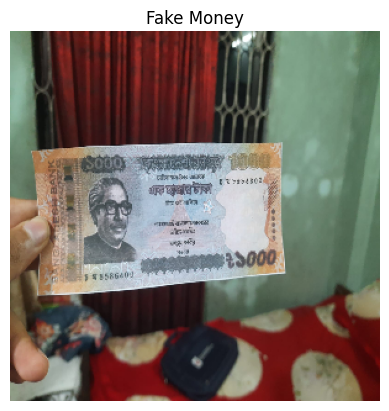

In [17]:
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
import keras.utils as image

model1 = load_model('/content/drive/MyDrive/Colab Notebooks/Project_Final_2023/my_FinalProjectmodel_ResNet_final.h5')
img_pred = image.load_img(r"/content/1.jpg", target_size=(300, 300))

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)
img_pred = img_pred / 255.0

result = model1.predict(img_pred)
print(result)

if result[0][0] > result[0][1]:
    prediction = "Fake Money"
else:
    prediction = "Real Money"

print(prediction)

# Display the image
plt.imshow(img_pred[0])
plt.title(prediction)
plt.axis('off')
plt.show()


In [18]:
loss_train, accuracy_train = model.evaluate_generator(train_generator)
loss_val, accuracy_val = model.evaluate_generator(validation_generator)
total_samples = train_generator.samples + validation_generator.samples
total_accuracy = (accuracy_train * train_generator.samples + accuracy_val * validation_generator.samples) / total_samples

print("Total Accuracy:", total_accuracy)

<ipython-input-18-ea59283b7cd5>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_train, accuracy_train = model.evaluate_generator(train_generator)
<ipython-input-18-ea59283b7cd5>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_val, accuracy_val = model.evaluate_generator(validation_generator)


Total Accuracy: 0.7763781956091228
